In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/My Drive/Dataset/Salary_Data.csv')

In [12]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

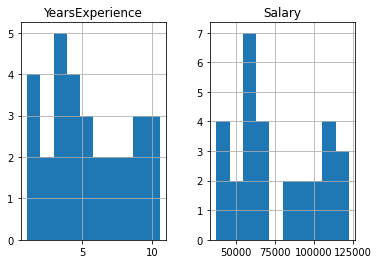

In [16]:
from matplotlib import pyplot
df.hist()
pyplot.show()

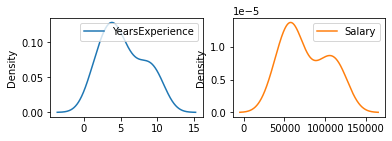

In [17]:
df.plot(kind='density' ,subplots=True, layout=(2,2), sharex=False)
pyplot.show()

In [18]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [19]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1].values

In [20]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [21]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 7)

In [23]:
X_train

array([[ 4. ],
       [ 4.1],
       [ 5.1],
       [ 1.1],
       [10.3],
       [ 3. ],
       [ 9.5],
       [ 6.8],
       [ 3.9],
       [ 7.1],
       [ 3.2],
       [ 4.5],
       [ 3.2],
       [ 8.2],
       [ 6. ],
       [ 2. ],
       [ 7.9],
       [ 9. ],
       [ 2.2],
       [ 4.9]])

In [24]:
X_test

array([[ 1.5],
       [ 5.3],
       [ 1.3],
       [ 3.7],
       [ 4. ],
       [ 2.9],
       [ 5.9],
       [ 8.7],
       [ 9.6],
       [10.5]])

In [25]:
Y_train

array([ 56957.,  57081.,  66029.,  39343., 122391.,  60150., 116969.,
        91738.,  63218.,  98273.,  64445.,  61111.,  54445., 113812.,
        93940.,  43525., 101302., 105582.,  39891.,  67938.])

In [26]:
Y_test

array([ 37731.,  83088.,  46205.,  57189.,  55794.,  56642.,  81363.,
       109431., 112635., 121872.])

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 38744.28011204,  75907.        ,  36788.34748636,  60259.53899455,
        63193.43793307,  52435.80849182,  81774.79787705, 109157.85463659,
       117959.55145216, 126761.24826773])

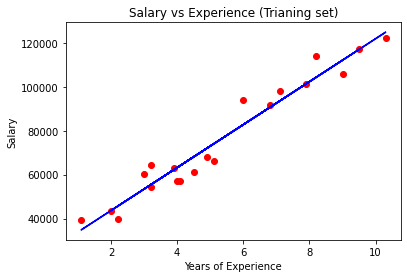

In [29]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Trianing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

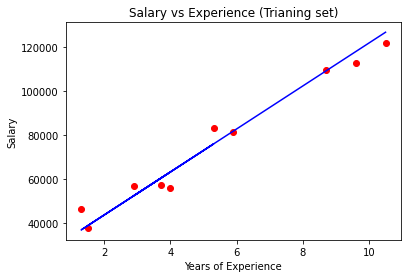

In [30]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Trianing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [31]:
print("Regressor slope:  %2.f  "%( regressor.coef_))
print("Regressor intercept:%2.f  "% regressor.intercept_)

Regressor slope:  9780  
Regressor intercept:24075  


In [32]:
YearsExperience= 3
print("Salary for given Years of Experience is :     %.2f"    %(regressor.predict([[YearsExperience]])))

Salary for given Years of Experience is :     53413.77


In [33]:
from sklearn import metrics
print("MAE %2.f" %(metrics.mean_absolute_error(Y_test,Y_pred)))

MAE 4319


In [34]:
from sklearn import metrics
print("MAE %2.f" %(np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred))))

MAE 66


In [35]:
print('Train Score: %f' %(regressor.score(X_train, Y_train))) 
print('Test Score: %f' % (regressor.score(X_test, Y_test)) )
print("Underfitting")

Train Score: 0.949650
Test Score: 0.966103
Underfitting


In [36]:
import pickle 
saved_model = pickle.dumps(regressor) 
saved_model = pickle.loads(saved_model) 
saved_model.predict(X_test)

array([ 38744.28011204,  75907.        ,  36788.34748636,  60259.53899455,
        63193.43793307,  52435.80849182,  81774.79787705, 109157.85463659,
       117959.55145216, 126761.24826773])

In [37]:
saved_model.predict(X_train)

array([ 63193.43793307,  64171.40424591,  73951.06737432,  34832.41486068,
       124805.31564205,  53413.77480466, 116981.58513932,  90576.49469261,
        62215.47162023,  93510.39363114,  55369.70743034,  68083.26949727,
        55369.70743034, 104268.02307239,  82752.76418989,  43634.11167625,
       101334.12413386, 112091.75357511,  45590.04430193,  71995.13474864])

In [50]:
import joblib
filename = '/content/drive/My Drive/Salary_Prediction.sav'
joblib.dump(regressor, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
result

0.9661033862309316

In [51]:
import pickle 
print("[INFO] Saving model...")
saved_model=pickle.dump(regressor,open('/content/drive/My Drive/Salary_Prediction.pkl', 'wb')) 

[INFO] Saving model...


In [52]:
import joblib
filename = '/content/drive/My Drive/linear.sav'
joblib.dump(regressor, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
result

0.9661033862309316

In [53]:
EXP1 =  6#@param {type:"number"}
output = loaded_model.predict([[EXP1]])
output

array([82752.76418989])

In [54]:
import pickle
model = pickle.load(open('/content/drive/My Drive/linearregression.pkl','rb'))  
model.predict(X_test)

array([ 38744.28011204,  75907.        ,  36788.34748636,  60259.53899455,
        63193.43793307,  52435.80849182,  81774.79787705, 109157.85463659,
       117959.55145216, 126761.24826773])

In [55]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The reason is that the flask server creates a server that runs locally on the allocated runtime on google colab as localhost. In order to expose the server to the outside traffic or to make the server accessible outside the runtime globally on HTTP, ngrok is used


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
%mkdir templates -p

In [58]:
%%writefile templates/index.html

<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
<title>Machine Learning  Linear Regression Deployment</title>
<meta charset="UTF-8">
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<!-- JavaScript Bundle with Popper -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js" integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa" crossorigin="anonymous"></script>
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous"> 
<style><!DOCTYPE html>
h1 {text-align: center;}
h2 {text-align: center;}
h3 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>
<body>
<div class = ""style = "background-color:blue;">
<div class = "clearfix">
<div class="col-md-12">
<center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
<center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
<center><p style="font-size:25px;color:white;margin-top:10px;">Summer Internship 2022 on Machine learning and Data Science</p></center> 
</div>
<div class="login">
<h2 >Regression Analysis to predict salary on the basis Experiance</h2>
<h4>Developed by Nitish Nama</h4>
<!-- Main Input For Receiving Query to our ML -->
<form action="{{ url_for('predict')}}"method="get">
<div class="form-floating mb-3">
<input type="number" class="form-control" id="exp" name="exp" step="any" min="0" max="100" placeholder="0" required="required">
<label for="floatingInput">Enter experince in years</label>
</div>
<br>
<br>
<button type="submit" class="btn btn-primary btn-block btn-large">Predict salary for Given Experinace</button>
</form>
<br>
<br>
{{ prediction_text }}
<div class="col-md-12">
 <center><p style="font-size:25px;color:white;margin-top:20px;">Experiment Performed in Summer internship 2022 from 27 June to 8 August </p></center> 
</div>
</div>
</div>
</body>
</html>

Overwriting templates/index.html


In [59]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
!ngrok authtoken 2CVhNfyL2r6AJch27wQDv3ZU2sS_5xJy1jAxddS4M8qkJmLPM

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle


app = Flask(__name__)
model = pickle.load(open('/content/drive/My Drive/Salary_Prediction.pkl','rb')) 
run_with_ngrok(app)

@app.route('/')
def home():
  
    return render_template("index.html")
  
@app.route('/predict',methods=['GET'])
def predict():
    
    
    '''
    For rendering results on HTML GUI
    '''
    exp = float(request.args.get('exp'))
    
    prediction = model.predict([[exp]])
    
        
    return render_template('index.html', prediction_text='Regression Model  has predicted salary for given experinace is : {}'.format(prediction))


app.run()